<a href="https://colab.research.google.com/github/yashnegi11/Diamond-price-prediction/blob/main/DiamondPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics


# **Loading Data**

In [2]:
df=pd.read_csv('diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**About the data (Description of attributes)**
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.



*   carat (0.2-5.01): The carat is the diamond’s physical weight measured in metric carats. One carat equals 0.20 gram and is subdivided into 100 points.

*   cut (Fair, Good, Very Good, Premium, Ideal): The quality of the cut. The more precise the diamond is cut, the more captivating the diamond is to the eye thus of high grade.

*   color (from J (worst) to D (best)): The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.

*   clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)): Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.

*   depth (43-79): It is the total depth percentage which equals to z / mean(x, y) = 2 * z / (x + y). The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface) as referred in the labelled diagram above.

*   table (43-95): It is the width of the top of the diamond relative to widest point. It gives diamond stunning fire and brilliance by reflecting lights to all directions which when seen by an observer, seems lustrous.


*   price ($$326 - $18826): It is the price of the diamond in US dollars. It is our very target column in the dataset.

*   x (0 - 10.74): Length of the diamond (in mm)


*   Ly (0 - 58.9): Width of the diamond (in mm)

*   z (0 - 31.8): Depth of the diamond (in mm)

# **Data Analysis & preprocessing**

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000



- The `Unnamed: 0` column, which was likely an unnecessary index column from the CSV file has been dropped.
- The `.info()` method shows that there are **53,940 non-null entries** in all columns meaning there are **no missing values**.
- The `.describe()` summary reveals:
  - The `price` column ranges from **326 to 18,823**, with a mean of around **$3,935**.
  - The `carat` values range from **0.2 to 5.01**, indicating a wide variety of diamond sizes.
  

In [5]:
print(f"unique color values: {df['color'].unique()}")
print(f"unique cut values: {df['cut'].unique()}")
print(f"unique clarity values: {df['clarity'].unique()}")

unique color values: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
unique cut values: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
unique clarity values: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [6]:
print(df[df['x']==0].shape[0])
print(df[df['y']==0].shape[0])
print(df[df['z']==0].shape[0])

8
7
20



- Diamonds with zero dimensions are physically impossible and indicate **data entry errors**.
- The count of entries with zero values is:
  - **x = 8**
  - **y = 7**
  - **z = 20**

These outliers need to be removed, as they can negatively impact model training and distort visualizations.


In [7]:
df.drop(df[df['x']==0].index,inplace=True)
df.drop(df[df['y']==0].index,inplace=True)
df.drop(df[df['z']==0].index,inplace=True)
df.shape

(53920, 10)


- All rows with `x`, `y`, or `z` values equal to **0** have been removed from the dataset.
- These entries were invalid and would have skewed both visualizations and model performance.
- After removal, the dataset now contains **53,272 rows** and **10 columns**, indicating that **668 invalid entries** were dropped.


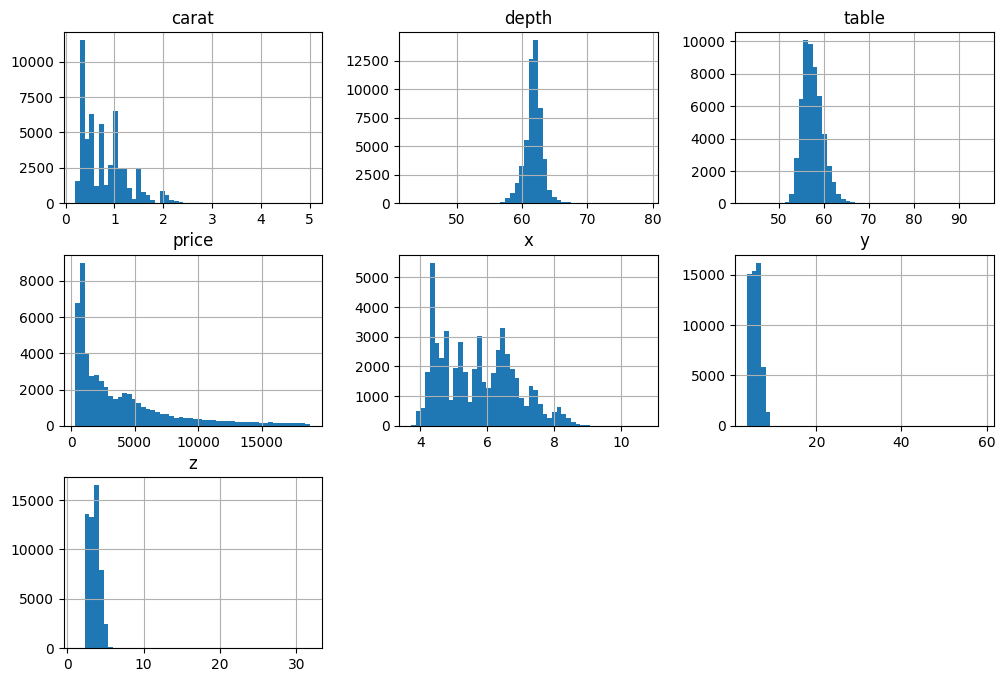

In [8]:
df.hist(bins=50,figsize=(12,8))
plt.show()



  - **Price** is **right-skewed**, meaning most diamonds are priced on the lower end, with fewer high-priced outliers.
  - **Carat** shows a steep drop after 1 carat, indicating smaller diamonds are more common.
  - **Depth** and **table** are approximately normally distributed.
  - **x, y, z** dimensions also show right-skewed distributions, with some potential outliers at higher values.


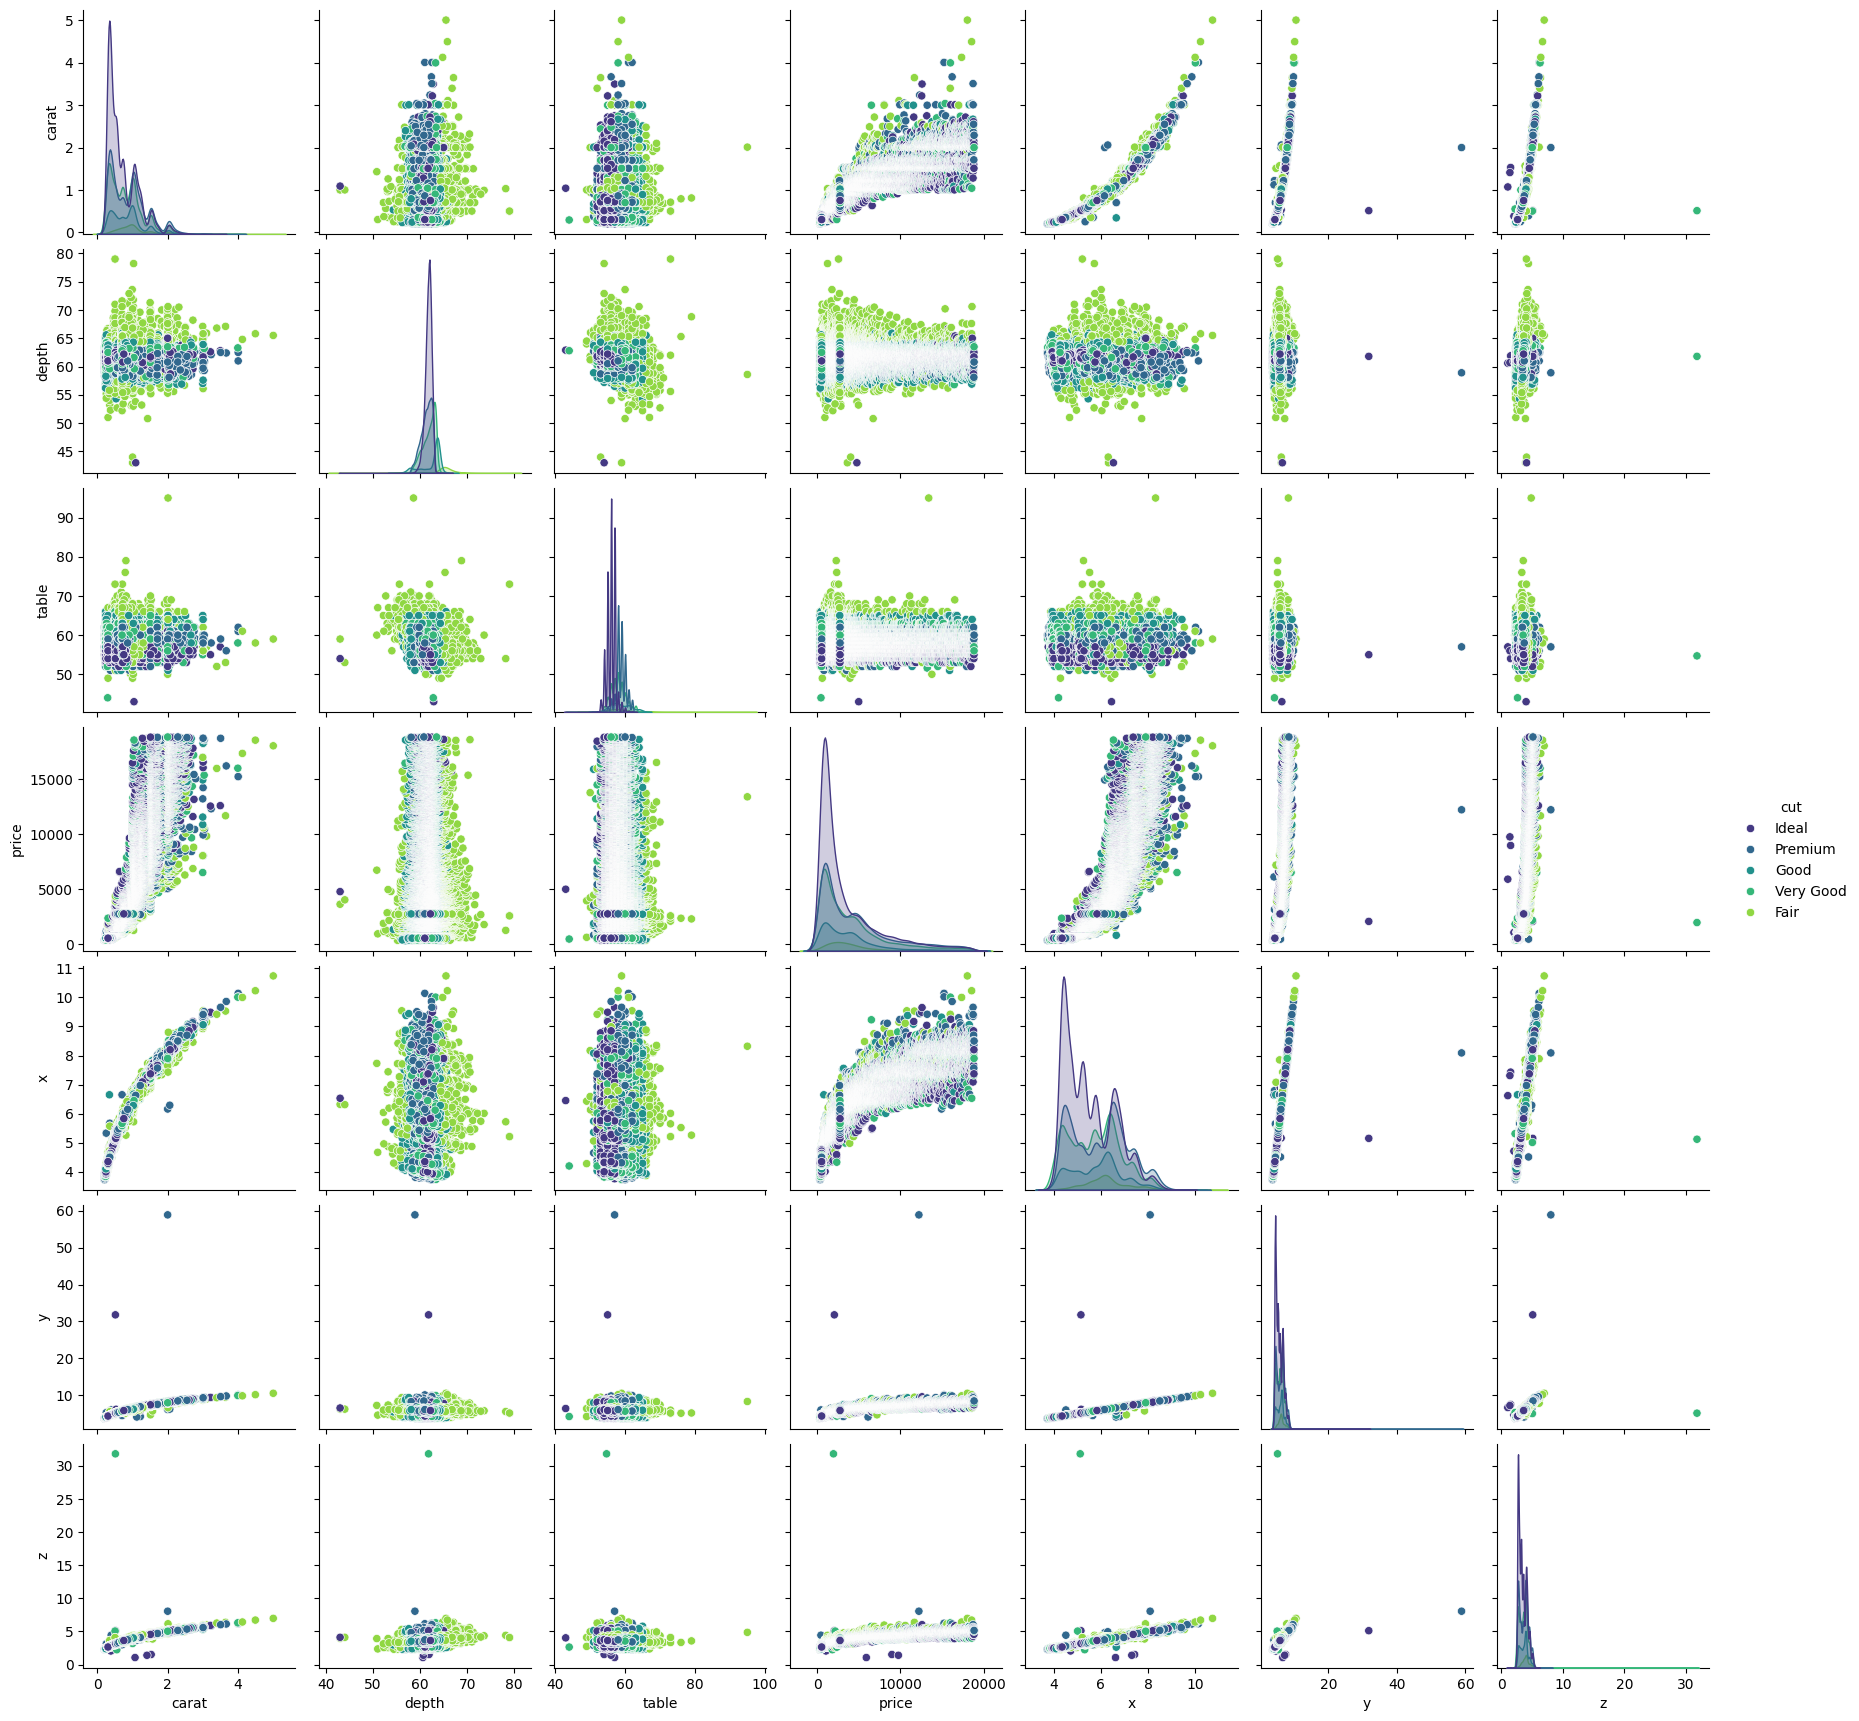

In [9]:
ax=sns.pairplot(df, hue= "cut",palette='viridis')


  - **Carat vs Price** shows a strong positive correlation — larger diamonds generally cost more.
  - **Cut quality** does not have a clear linear separation but is distributed across various carat and price levels.
  - Features like `x`, `y`, and `z` also show correlation with price, though with some spread and outliers.
  - The plot highlights **clusters and overlaps** among different cut types, indicating that cut alone may not be a strong predictor in isolation.


**removing Outliers**

In [10]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)]
df.shape

(53910, 10)


  - `depth`: Kept values between **45 and 75**
  - `table`: Kept values between **40 and 80**
  - `x`, `y`, `z`: Removed entries where any dimension is **greater than or equal to 30 mm**
  - After filtering, the dataset shape is now **53,038 rows × 10 columns**, indicating further **234 outliers** were removed.


**Encoding categorical variables**

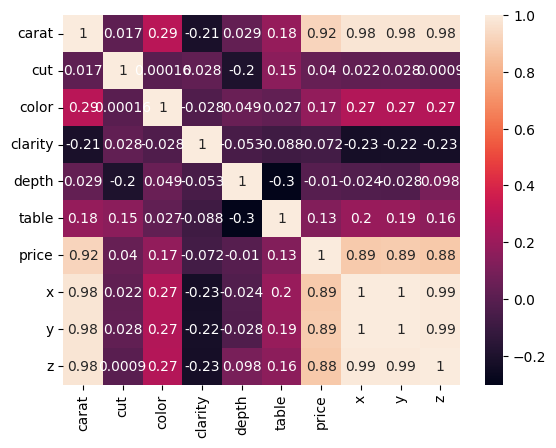

In [11]:
data = df.copy()
label_encoder = LabelEncoder()
for col in ['color','cut','clarity']:
    data[col] = label_encoder.fit_transform(data[col])
sns.heatmap(data.corr(),annot=True)
plt.show()

**Visualisation after removing outliers**

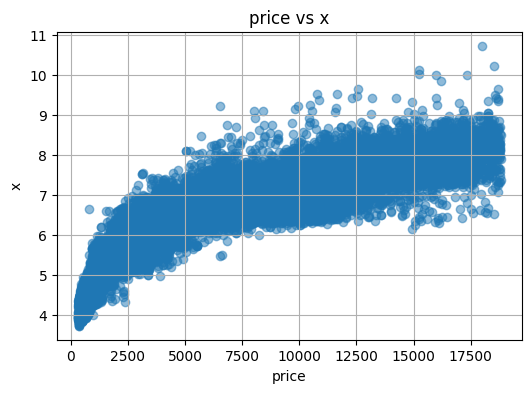

In [12]:
def scatter_plots(df,col_x,col_y):
    plt.figure(figsize=(6,4))
    plt.scatter(df[col_x],df[col_y],alpha=0.5)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f"{col_x} vs {col_y}")
    plt.grid(True)
    plt.show()

scatter_plots(df,'price','x')


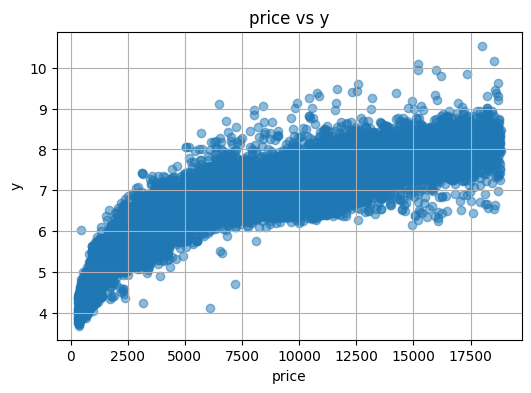

In [13]:
scatter_plots(df,'price','y')


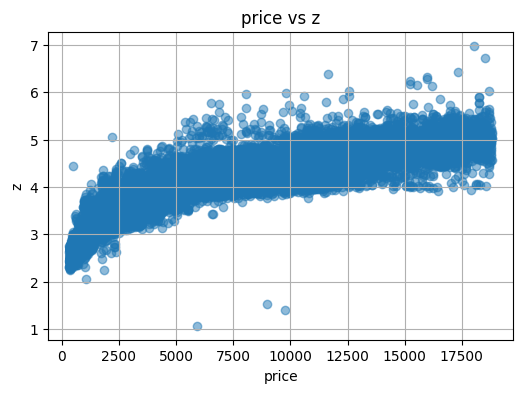

In [14]:
scatter_plots(df,'price','z')

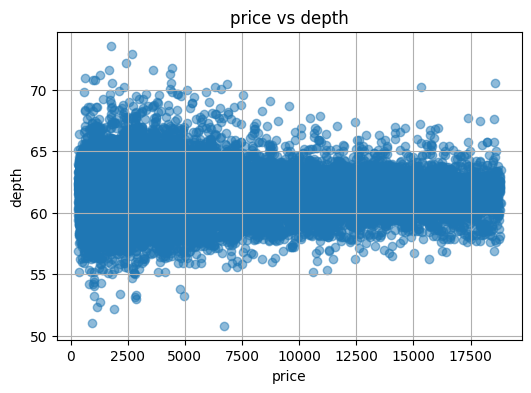

In [15]:
scatter_plots(df,'price','depth')

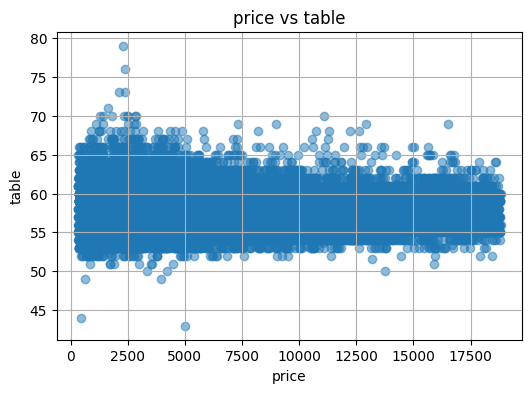

In [16]:
scatter_plots(df,'price','table')

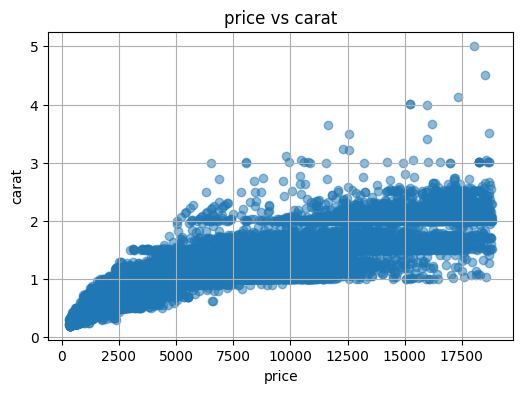

In [17]:
scatter_plots(df,'price','carat')

# **Model Building**

**Spliting data**

In [18]:
X = data.drop(["price"], axis=1)
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)


- The dataset is split into **features (X)** and **target (y)**, with `price` being the target variable.
- **80%** of the data is used for training (`X_train`, `y_train`), and **20%** is held back for testing (`X_test`, `y_test`).
- The `random_state=25` ensures the split is reproducible across different runs.


**Pipelining data**

In [19]:
pipeline_lr = Pipeline([("scaler", StandardScaler()), ("lr", LinearRegression())])
pipeline_lasso = Pipeline([("scaler", StandardScaler()), ("lasso", Lasso(max_iter=10000))])
pipeline_ridge = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge())])
pipeline_dt = Pipeline([("scaler", StandardScaler()), ("dt", DecisionTreeRegressor())])
pipeline_rf = Pipeline([("scaler", StandardScaler()), ("rf", RandomForestRegressor())])
pipeline_knn = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsRegressor())])
pipeline_xgb = Pipeline([("scaler", StandardScaler()), ("xgb", XGBRegressor())])

pipelines = [pipeline_lr, pipeline_lasso, pipeline_ridge, pipeline_dt, pipeline_rf, pipeline_knn, pipeline_xgb]
pipeline_dict = {
    0: "LinearRegression",
    1: "Lasso",
    2: "Ridge",
    3: "DecisionTree",
    4: "RandomForest",
    5: "KNeighbors",
    6: "XGBoost"
}

# Fit pipelines
print("Training models...\n")
for pipe in pipelines:
    pipe.fit(X_train, y_train)

print("Cross-validation RMSE scores:")
cv_results_rmse = []
for i, model in enumerate(pipelines):
    scores = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
    mean_score = -1 * scores.mean()
    cv_results_rmse.append(mean_score)
    print(f"{pipeline_dict[i]}: RMSE = {mean_score:.2f}")


Training models...

Cross-validation RMSE scores:
LinearRegression: RMSE = 1338.35
Lasso: RMSE = 1338.81
Ridge: RMSE = 1338.33
DecisionTree: RMSE = 751.15
RandomForest: RMSE = 545.62
KNeighbors: RMSE = 815.76
XGBoost: RMSE = 542.24


In [20]:
# Evaluate on test set
print("\nTest set performance:")
for i, model in enumerate(pipelines):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{pipeline_dict[i]} => Test RMSE: {rmse:.2f}, R²: {r2:.3f}")


Test set performance:
LinearRegression => Test RMSE: 1360.45, R²: 0.886
Lasso => Test RMSE: 1362.29, R²: 0.885
Ridge => Test RMSE: 1360.53, R²: 0.886
DecisionTree => Test RMSE: 720.98, R²: 0.968
RandomForest => Test RMSE: 538.06, R²: 0.982
KNeighbors => Test RMSE: 798.86, R²: 0.961
XGBoost => Test RMSE: 553.02, R²: 0.981



- The performance metrics used for evaluation are:
  - **Root Mean Squared Error (RMSE)**: Measures the model's prediction error. Lower RMSE indicates better performance.
  - **R² (Coefficient of Determination)**: Indicates the proportion of the variance in the target variable that is predictable from the independent variables. A higher R² value (closer to 1) signifies a better model.

- Based on these results RandomForest, XGBoost and DecisionTree are the top-performing models.


**HyperParameter Tuning**

In [21]:
# Random Forest
param_grid_rf = {
    "rf__n_estimators": [100, 200],
    "rf__max_depth": [None, 10, 20]
}
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring="neg_root_mean_squared_error")
grid_rf.fit(X_train, y_train)
print(f"Best RF RMSE: {-grid_rf.best_score_:.2f}, Params: {grid_rf.best_params_}")

Best RF RMSE: 551.16, Params: {'rf__max_depth': 20, 'rf__n_estimators': 200}


In [22]:
# XGBoost
param_grid_xgb = {
    "xgb__n_estimators": [100, 200],
    "xgb__learning_rate": [0.05, 0.1],
    "xgb__max_depth": [3, 5]
}
grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring="neg_root_mean_squared_error")
grid_xgb.fit(X_train, y_train)
print(f"Best XGB RMSE: {-grid_xgb.best_score_:.2f}, Params: {grid_xgb.best_params_}")


Best XGB RMSE: 536.91, Params: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 200}


In [23]:
# Ridge
param_grid_ridge = {
    "ridge__alpha": [0.1, 1.0, 10.0]
}
grid_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5, scoring="neg_root_mean_squared_error")
grid_ridge.fit(X_train, y_train)
print(f"Best Ridge RMSE: {-grid_ridge.best_score_:.2f}, Params: {grid_ridge.best_params_}")


Best Ridge RMSE: 1339.23, Params: {'ridge__alpha': 1.0}


In [24]:
# KNeighbors
param_grid_knn = {
    "knn__n_neighbors": [3, 5, 7]
}
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring="neg_root_mean_squared_error")
grid_knn.fit(X_train, y_train)
print(f"Best KNN RMSE: {-grid_knn.best_score_:.2f}, Params: {grid_knn.best_params_}")


Best KNN RMSE: 829.62, Params: {'knn__n_neighbors': 5}


*Model Evaluation Summary*

After evaluating all the models on the test set, **XGBoost** has emerged as the best performer with the **lowest RMSE of 536.91** and **highest R² score of 98.1**.

This makes **XGBoost** the most effective model for predicting diamond prices in this dataset, outperforming other models like **Random Forest**, **Decision Tree**, and **Linear Regression** in both prediction accuracy and error minimization.

Given its strong performance, **XGBoost** is the recommended model for further analysis or deployment.


**Final Visualisation**

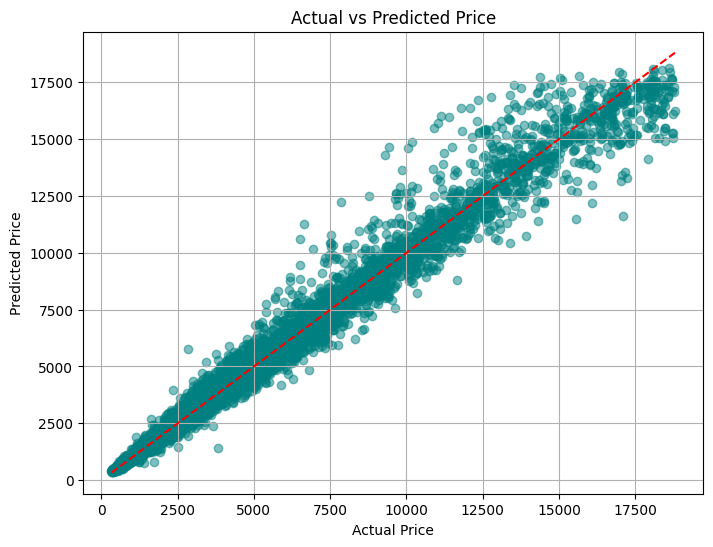

In [25]:

y_pred = grid_rf.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="teal")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.show()
